# Layernorm
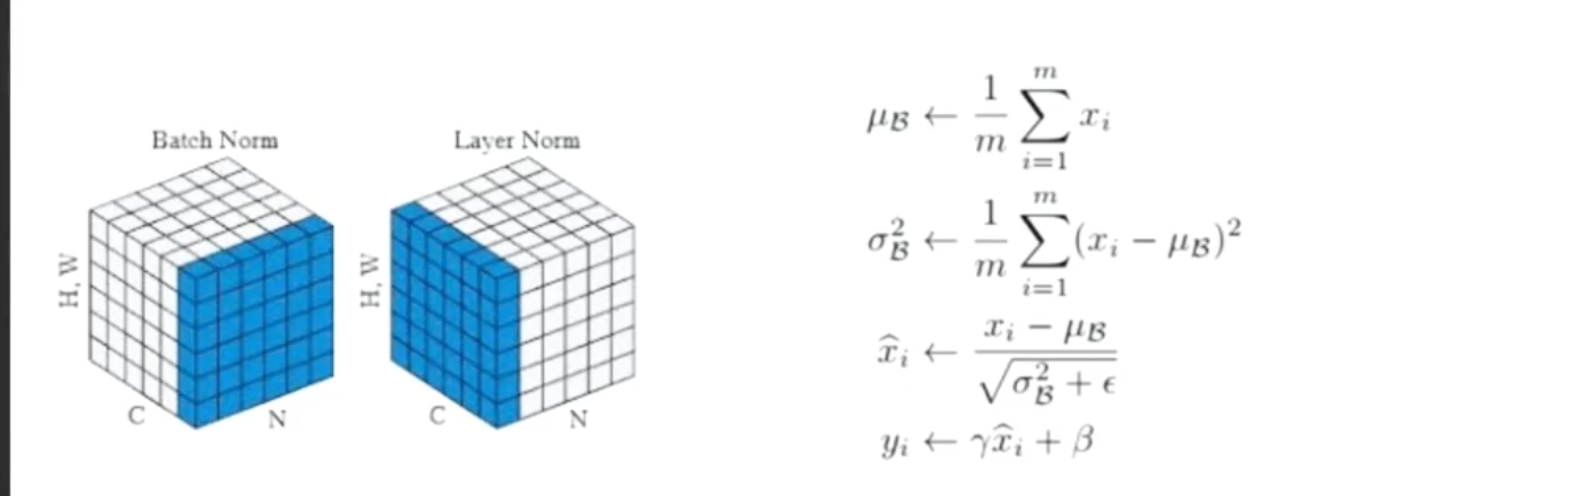
- LayerNormal不再通道尺度上进行归一化而是一个样本的一个尺度进行一个归一化

In [3]:
from torch import nn

In [4]:
class LayerNorm(nn.Module):
  def __init__(self, d_model, eps=1e-12):
    super(LayerNorm, self).__init__()
    self.gamma = nn.Parameter(torch.ones(d_model)) # 参数
    self.beta = nn.Parameter(torch.zeros(d_model))
    self.eps = eps
  
  def forward(self, x):
    mean = x.mean(dim=-1, keepdim=True)
    # 不适用无偏估计 
    var = x.var(dim=-1, unbiased=False, keepdim=True)
    out = (x - mean) / torch.sqrt(var + self.eps)
    return out * self.gamma + self.beta